In [2]:
%reload_ext autoreload
%autoreload 2
from brian2 import *
from lz76 import LZ76
from echo_time import *
from functools import partial
from multiprocessing import Pool

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import power_spectral_density as psd
import experiment_10_full_ping_connectome as ex10
import experiment_12_thalamus as ex12
#from IPython.display import Image

from plotlib import *

In [6]:
def plot_stuff(data, start=1000, end=2000, max_mod=None, save=None):
#    N, N_EX, N_IN = 50, 40, 10
    #N, N_EX, N_IN = 100, 80, 20
    n_ex, n_in, n_mod, n_ex_mod, n_in_mod, X, Y, X2, Y2 = [
        data[k]
        for k
        in ['n_ex', 'n_in', 'n_mod', 'n_ex_mod', 'n_in_mod', 'X', 'Y', 'X2', 'Y2']
    ]
    
    if max_mod:
        n_ex = n_ex_mod * min(n_mod, max_mod)
        n_in = n_in_mod * min(n_mod, max_mod)
    #n_ex = n_ex_mod * min(n_mod, 10)
    #n_in = n_in_mod * min(n_mod, 10)
    start_time = start
    end_time = end
    
    #mask1 = np.logical_and(X >= start_time, X < end_time)
    #mask2 = np.logical_and(X2 >= start_time, X2 < end_time)
    
    print("{:,} exc spikes, {:,} inh spikes".format(len(X), len(X2)))
    
    mask = np.logical_and.reduce((X >= start_time, X < end_time, Y < n_ex))
    mask2 = np.logical_and.reduce((X2 >= start_time, X2 < end_time, Y2 < n_in))
    
    fig, axarr = plt.subplots(3, figsize=(15,15))
    axarr[0].plot(X[mask], Y[mask], '.', color='C0', label='Excitatory Population')
    axarr[0].plot(X2[mask2], Y2[mask2]+n_ex, '.', color='C1', label='Inhibitory Population')
    axarr[0].set_ylabel('Neuron index')
    axarr[0].set_xlabel('Simulation Time (ms)')
    axarr[0].set_title('Raster plot of spikes')
    axarr[0].set_xlim([start_time, end_time])
    #axarr[0].legend(loc=3)
    
    dt, shift = 5, 5
    plot_ma(n_ex, X[mask], dt, shift, ax=axarr[1] , label='Excitatory Population')
    plot_ma(n_in, X2[mask2], dt, shift, ax=axarr[1], label='Inhibitory Population')
    axarr[1].set_xlabel('Simulation Time (ms)')
    axarr[1].set_xlim([start_time, end_time])
    axarr[1].legend()
    
    #fig, axarr = plt.subplots(2, sharex=True, figsize=(15,6))
    plot_spectrum(X, dt, shift, ax=axarr[2], label='Excitatory Population')
    plot_spectrum(X2, dt, shift, ax=axarr[2], label='Inhibitory Population')
    axarr[2].set_xticks(np.arange(0, (1000.0/shift)/2.0 + 1, 10))
    axarr[2].legend()
    
    plt.tight_layout()
    if save:
        plt.savefig(save)
    plt.show()



In [35]:
data = ex10.run_experiment(n_mod=1000, duration=5000, inter_scaling=50)

Setting up synapses... 
	EX_IN_SYN... (279,363 synapses) [0.91s]
	IN_EX_SYN... (399,200 synapses) [1.12s]
	IN_IN_SYN... (99,800 synapses) [0.23s]
	INTER_EX_EX_SYN... (5,713,203 synapses) [32.73s]
All synapses created [35.01s]
Supplying Poisson input to network...  [0.00s]
Running sym...  [201.79s]


7,873,560 exc spikes, 5,670,163 inh spikes


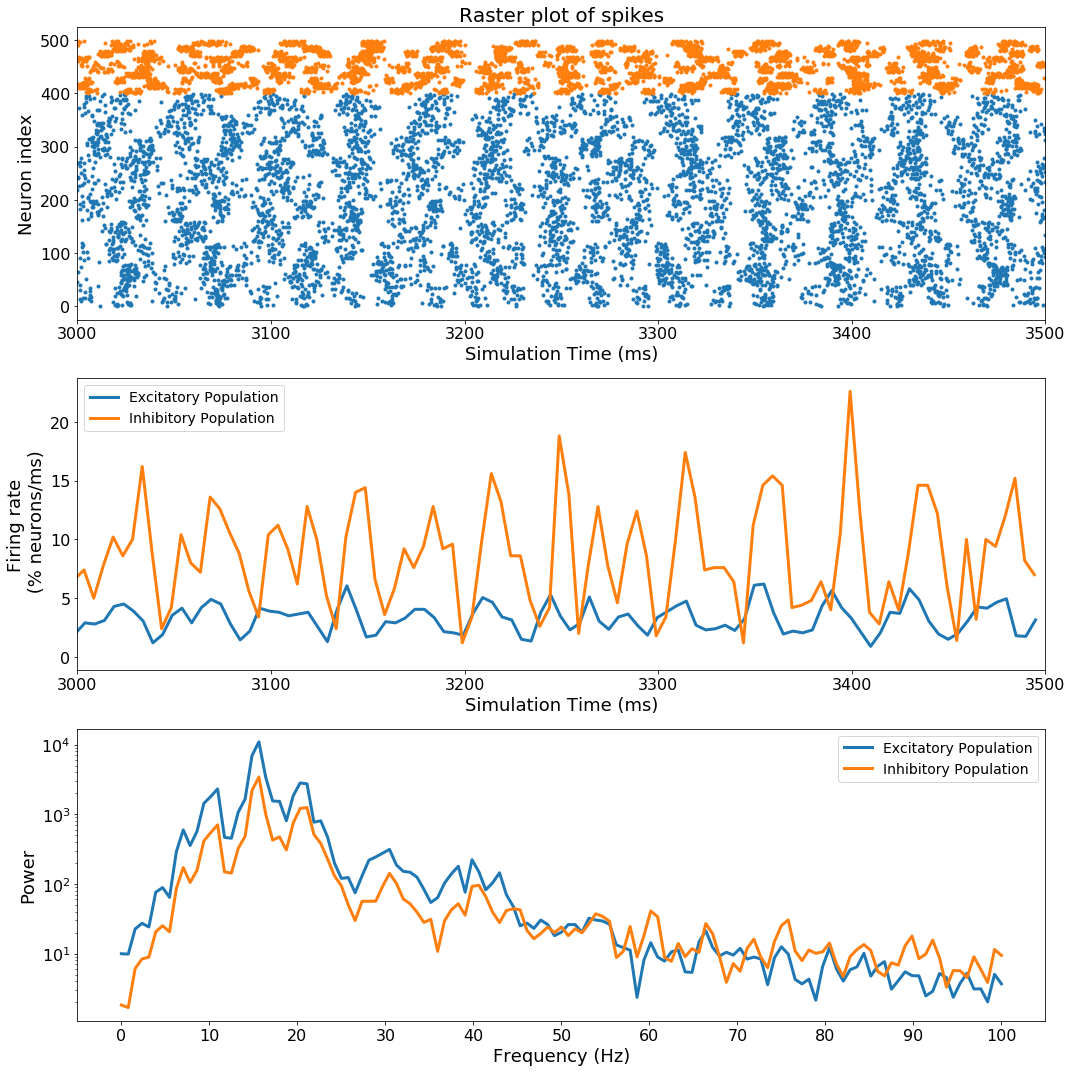

In [36]:
plot_stuff(data, start=3000, end=3500, max_mod=10)

In [256]:
data2 = ex10.run_experiment(n_mod=1000, duration=5000)

Setting up synapses... 
	EX_IN_SYN... (279,752 synapses) [23.58s]
	IN_EX_SYN... (399,200 synapses) [29.09s]
	IN_IN_SYN... (99,800 synapses) [3.86s]
	INTER_EX_EX_SYN... (5,715,001 synapses) [35.14s]
All synapses created [91.71s]
Supplying Poisson input to network...  [0.01s]
Running sym...  [498.73s]


5,200,459 exc spikes, 5,124,550 inh spikes


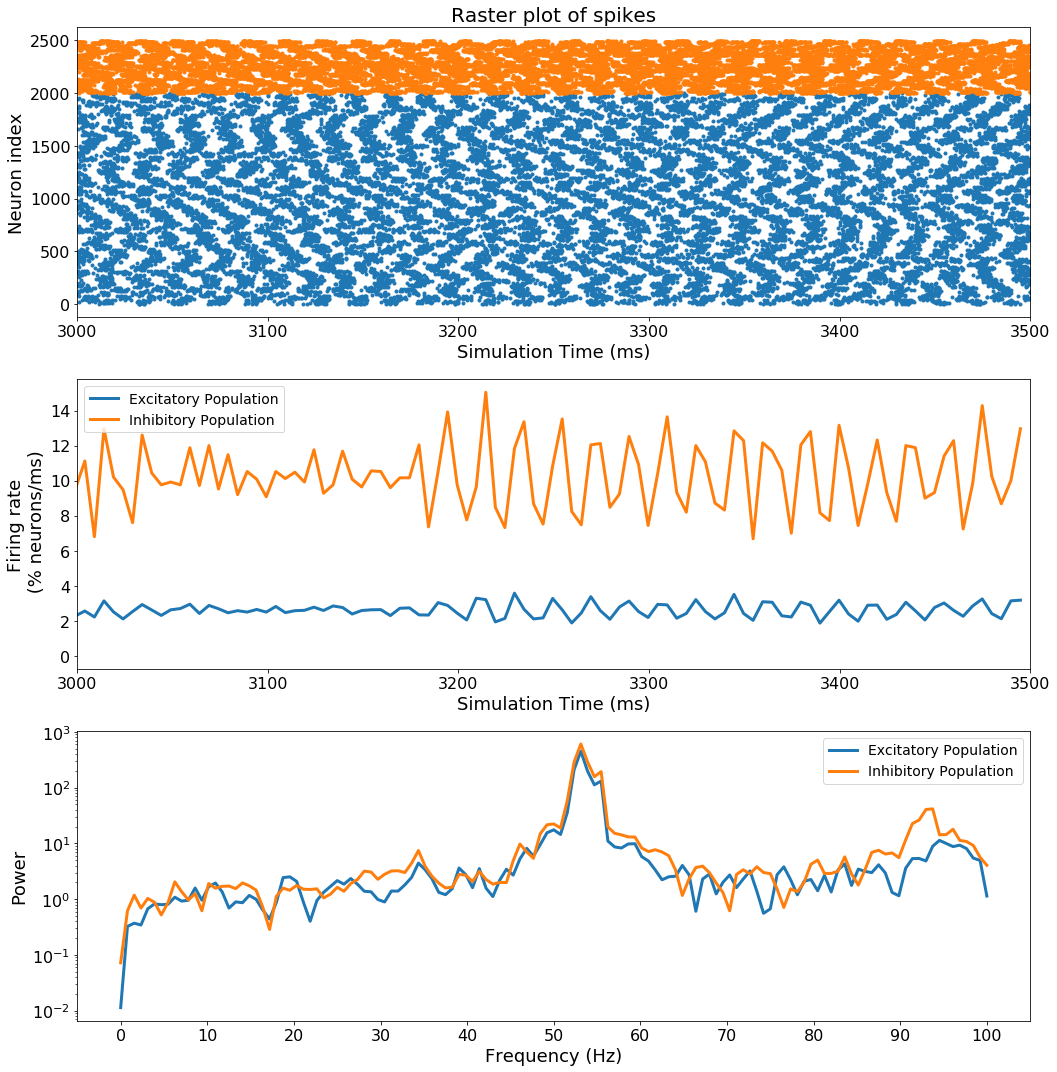

In [257]:
plot_stuff(data2, start=3000, end=3500, max_mod=50)

Separating spikes into modules...  [0.89s]
Calculating LZ complexity of modules...  [3.27s]


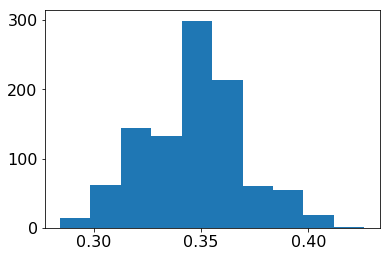

Process PoolWorker-23:
Process PoolWorker-21:
Process PoolWorker-22:
Process PoolWorker-19:
Process PoolWorker-20:
Process PoolWorker-24:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/process.py", line 114, in run
    self.run()
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiproces

In [281]:
plot_lz(data)

Separating spikes into modules...  [0.87s]
Calculating LZ complexity of modules...  [3.16s]


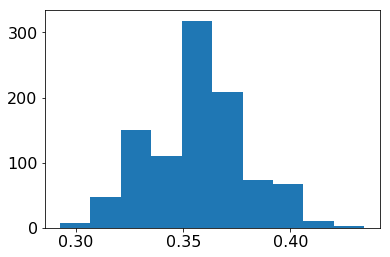

Process PoolWorker-25:
Process PoolWorker-30:
Process PoolWorker-29:
Process PoolWorker-28:
Process PoolWorker-26:
Traceback (most recent call last):
Process PoolWorker-27:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/process.py", line 114, in run
    self.run()
    

In [282]:
plot_lz(data2)

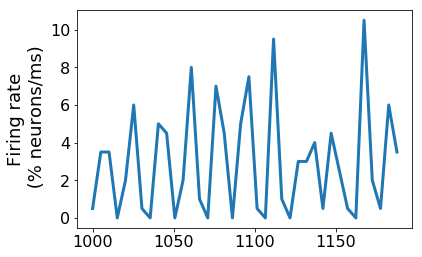

In [249]:
dt, shift = 5, 5
a = modules[0]
start, end = 1000, 1200
mask = np.logical_and.reduce((a >= start, a < end))
plot_ma(n_ex_mod, a[mask], dt, shift)
plt.show()

# Experiment 10 with variability across modules

In [40]:
dat = ex10.run_experiment(n_mod=1000, duration=5000, inter_scaling=50)
#k = range(10)
#sig = [1 for _ in range(10)]
#syn = ex10.get_synapses(10, 5, 10, k, sig, k, sig, 1.0)
#print(syn)

Setting up synapses... 
	EX_IN_SYN... (279,363 synapses) [0.91s]
	IN_EX_SYN... (399,200 synapses) [1.07s]
	IN_IN_SYN... (99,800 synapses) [0.30s]
	INTER_EX_EX_SYN... (5,713,203 synapses) [34.34s]
All synapses created [36.65s]
Supplying Poisson input to network...  [0.00s]
Running sym...  [197.07s]


Module 109: w = 11.8885087994, d = 7.6435270281
9,196,937 exc spikes, 4,938,458 inh spikes


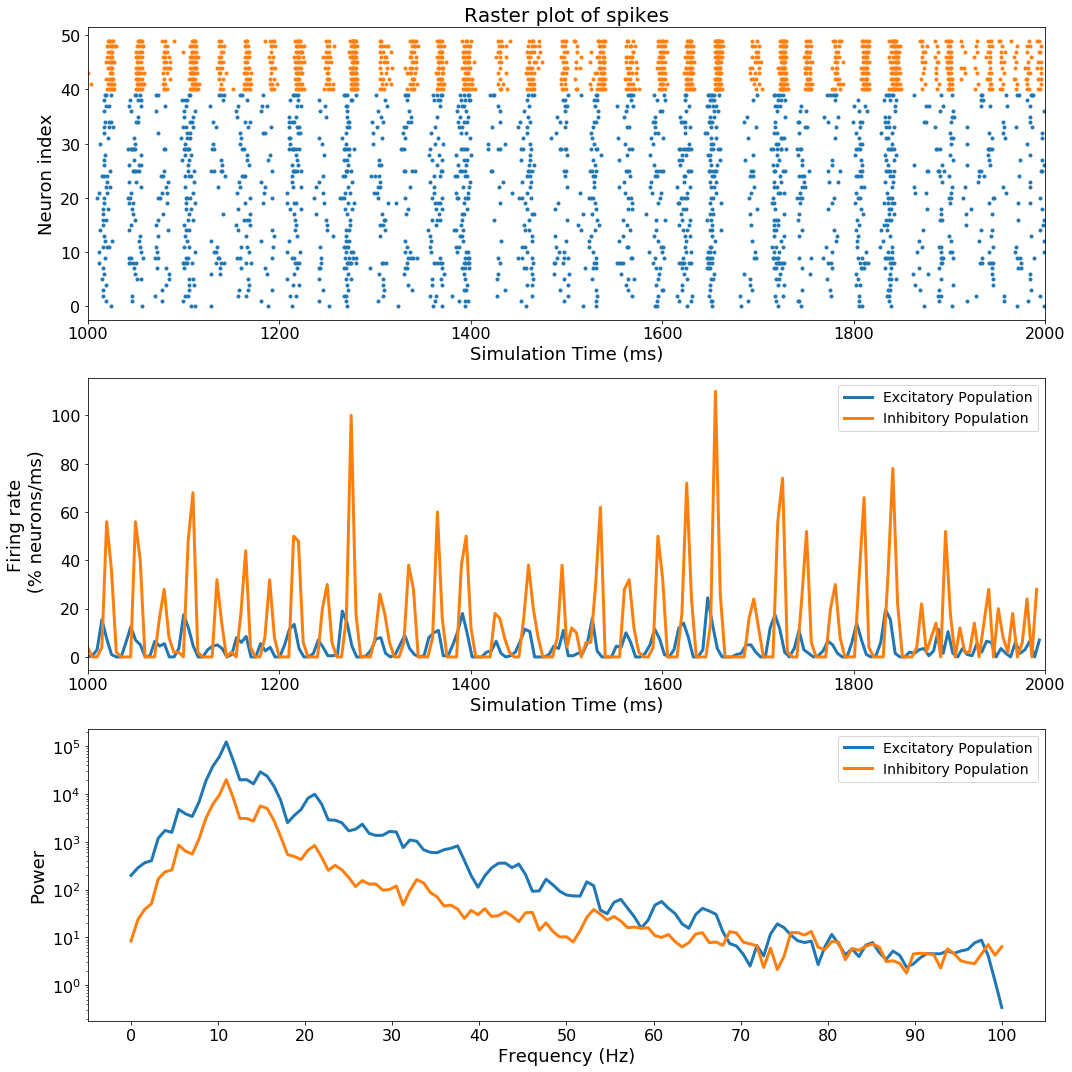

In [48]:
m = np.random.randint(998)
print("Module {}: w = {}, d = {}".format(m, dat['mu_w'][m], dat['mu_d'][m]))
plot_stuff(dat, min_mod=m, max_mod=m+1)

ValueError: setting an array element with a sequence.

In [304]:
def plot_stuff_th(data, start=1000, end=2000, max_mod=None, save=None):
#    N, N_EX, N_IN = 50, 40, 10
    #N, N_EX, N_IN = 100, 80, 20
    n_ex, n_in, n_mod, n_ex_mod, n_in_mod, X, Y, X2, Y2 = [
        data[k]
        for k
        in ['n_ex', 'n_in', 'n_mod', 'n_ex_mod', 'n_in_mod', 'X3', 'Y3', 'X4', 'Y4']
    ]
    n_ex, n_in = 200, 50
    if max_mod:
        n_ex = n_ex_mod * min(n_mod, max_mod)
        n_in = n_in_mod * min(n_mod, max_mod)
    #n_ex = n_ex_mod * min(n_mod, 10)
    #n_in = n_in_mod * min(n_mod, 10)
    start_time = start
    end_time = end
    
    #mask1 = np.logical_and(X >= start_time, X < end_time)
    #mask2 = np.logical_and(X2 >= start_time, X2 < end_time)
    
    print("{:,} exc spikes, {:,} inh spikes".format(len(X), len(X2)))
    
    mask = np.logical_and.reduce((X >= start_time, X < end_time, Y < n_ex))
    mask2 = np.logical_and.reduce((X2 >= start_time, X2 < end_time, Y2 < n_in))
    
    fig, axarr = plt.subplots(3, figsize=(15,15))
    axarr[0].plot(X[mask], Y[mask], '.', color='C0', label='Excitatory Population')
    axarr[0].plot(X2[mask2], Y2[mask2]+n_ex, '.', color='C1', label='Inhibitory Population')
    axarr[0].set_ylabel('Neuron index')
    axarr[0].set_xlabel('Simulation Time (ms)')
    axarr[0].set_title('Raster plot of spikes')
    axarr[0].set_xlim([start_time, end_time])
    #axarr[0].legend(loc=3)
    
    dt, shift = 5, 5
    plot_ma(n_ex, X[mask], dt, shift, ax=axarr[1] , label='Excitatory Population')
    plot_ma(n_in, X2[mask2], dt, shift, ax=axarr[1], label='Inhibitory Population')
    axarr[1].set_xlabel('Simulation Time (ms)')
    axarr[1].set_xlim([start_time, end_time])
    axarr[1].legend()
    
    #fig, axarr = plt.subplots(2, sharex=True, figsize=(15,6))
    plot_spectrum(X, dt, shift, ax=axarr[2], label='Excitatory Population')
    plot_spectrum(X2, dt, shift, ax=axarr[2], label='Inhibitory Population')
    axarr[2].set_xticks(np.arange(0, (1000.0/shift)/2.0 + 1, 10))
    axarr[2].legend()
    
    plt.tight_layout()
    if save:
        plt.savefig(save)
    plt.show()



In [61]:
data_th = ex12.run_experiment(n_mod=100, thalamus_modulation=0.01)

Setting up synapses... 
	EX_IN_SYN... (27,891 synapses) [0.09s]
	IN_EX_SYN... (40,000 synapses) [0.24s]
	IN_IN_SYN... (10,000 synapses) [0.03s]
	INTER_EX_EX_SYN... (296,800 synapses) [1.98s]
	TH_OUT_SYN... (80,115 synapses) [0.50s]
	TH_EX_IN_SYN... (7,011 synapses) [0.03s]
	IN_EX_SYN... (10,000 synapses) [0.03s]
	IN_IN_SYN... (2,500 synapses) [0.02s]
All synapses created [2.97s]
Supplying Poisson input to network...  [0.01s]
Running sym...  [28.95s]


1,324,920 exc spikes, 657,812 inh spikes


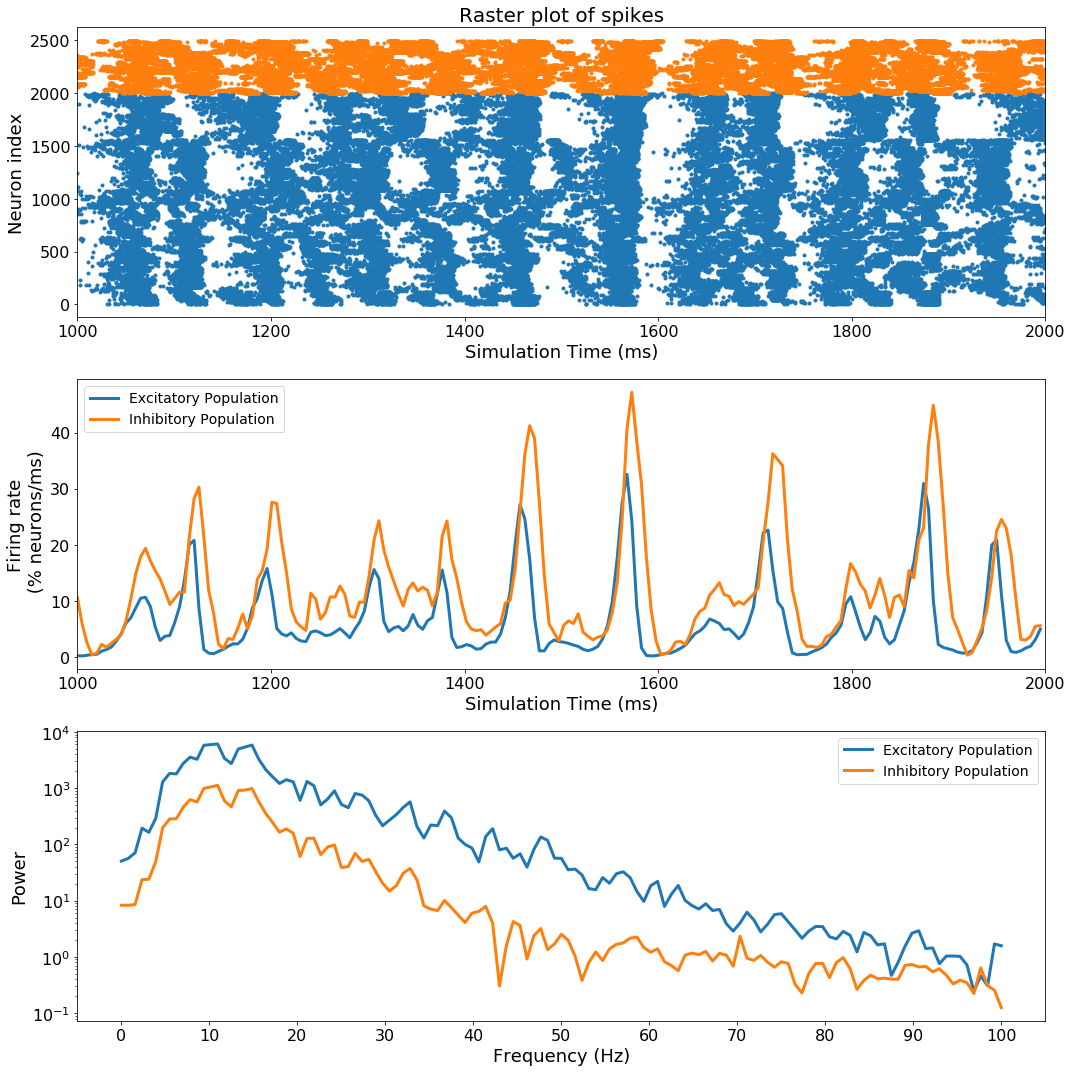

In [62]:
plot_stuff(data_th, max_mod=50)

In [311]:
data_th2 = ex12.run_experiment(n_mod=100, thalamus_modulation=2.0)

Setting up synapses... 
	EX_IN_SYN... (28,064 synapses) [0.32s]
	IN_EX_SYN... (40,000 synapses) [0.38s]
	IN_IN_SYN... (10,000 synapses) [0.08s]
	INTER_EX_EX_SYN... (298,140 synapses) [1.91s]
	TH_OUT_SYN... (80,191 synapses) [0.50s]
	TH_EX_IN_SYN... (6,918 synapses) [0.03s]
	IN_EX_SYN... (10,000 synapses) [0.04s]
	IN_IN_SYN... (2,500 synapses) [0.02s]
All synapses created [3.32s]
Supplying Poisson input to network...  [0.01s]
Running sym...  [33.07s]


2,661,267 exc spikes, 1,813,821 inh spikes


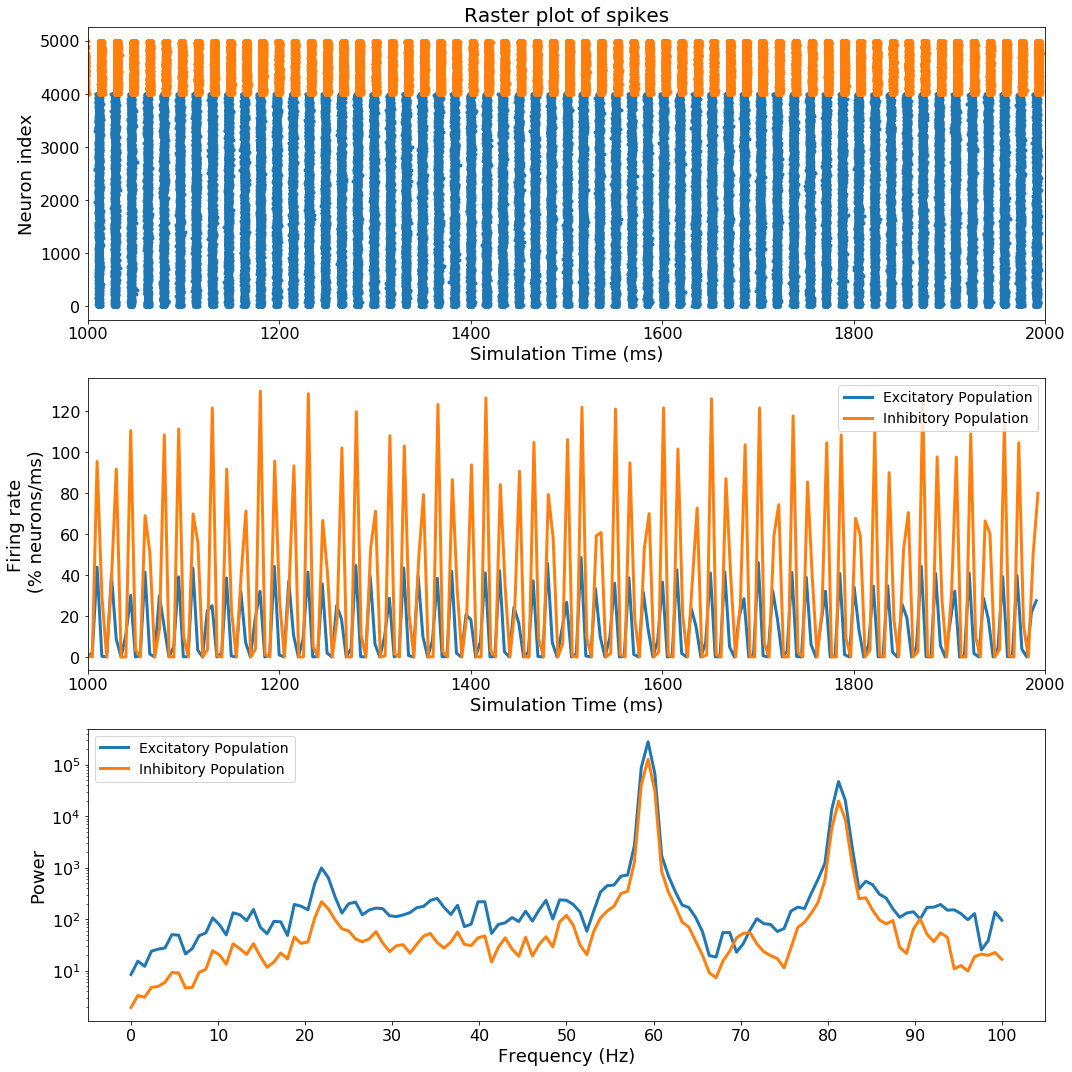

In [312]:
plot_stuff(data_th2)

In [3]:
def ex12_mapper(modulation, inter_scaling=20):
    return ex12.run_experiment(
        n_mod=100,
        thalamus_modulation=modulation,
        inter_scaling=inter_scaling
    )
e = echo_start("Running multipls sims varying the Thalamus modulation... ")
p = Pool(7)
modulation = np.linspace(0, 2, 10)
data_array = p.map(ex12_mapper, modulation)
echo_end(e)

In [30]:

s, e, dt, shift = 0, 5000, 5, 5
lz_complexities = []
for d in data_array:
    lz_complexities.append(get_lz_comp(d, s, e, dt, shift))


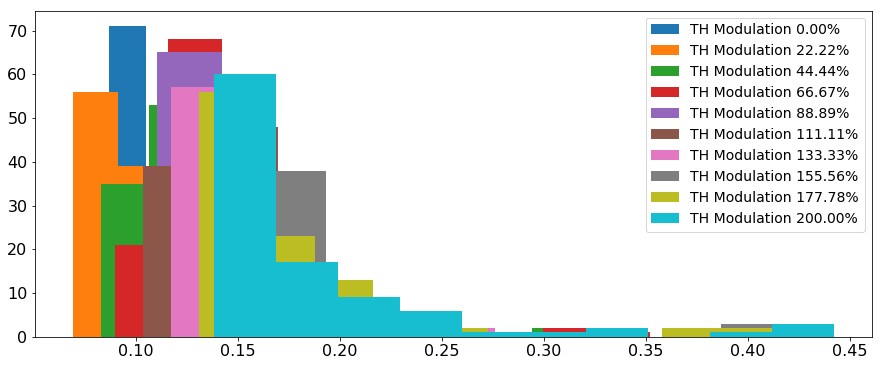

In [36]:

_, ax = plt.subplots(figsize=(15,6))
for lz_c, mod in zip(lz_complexities, modulation):
    plot_lz(lz_c, s, e, dt, shift, ax=ax, label='TH Modulation {:.2f}%'.format(mod*100))
plt.legend()
plt.show()

9,258,237 exc spikes, 2,461,811 inh spikes


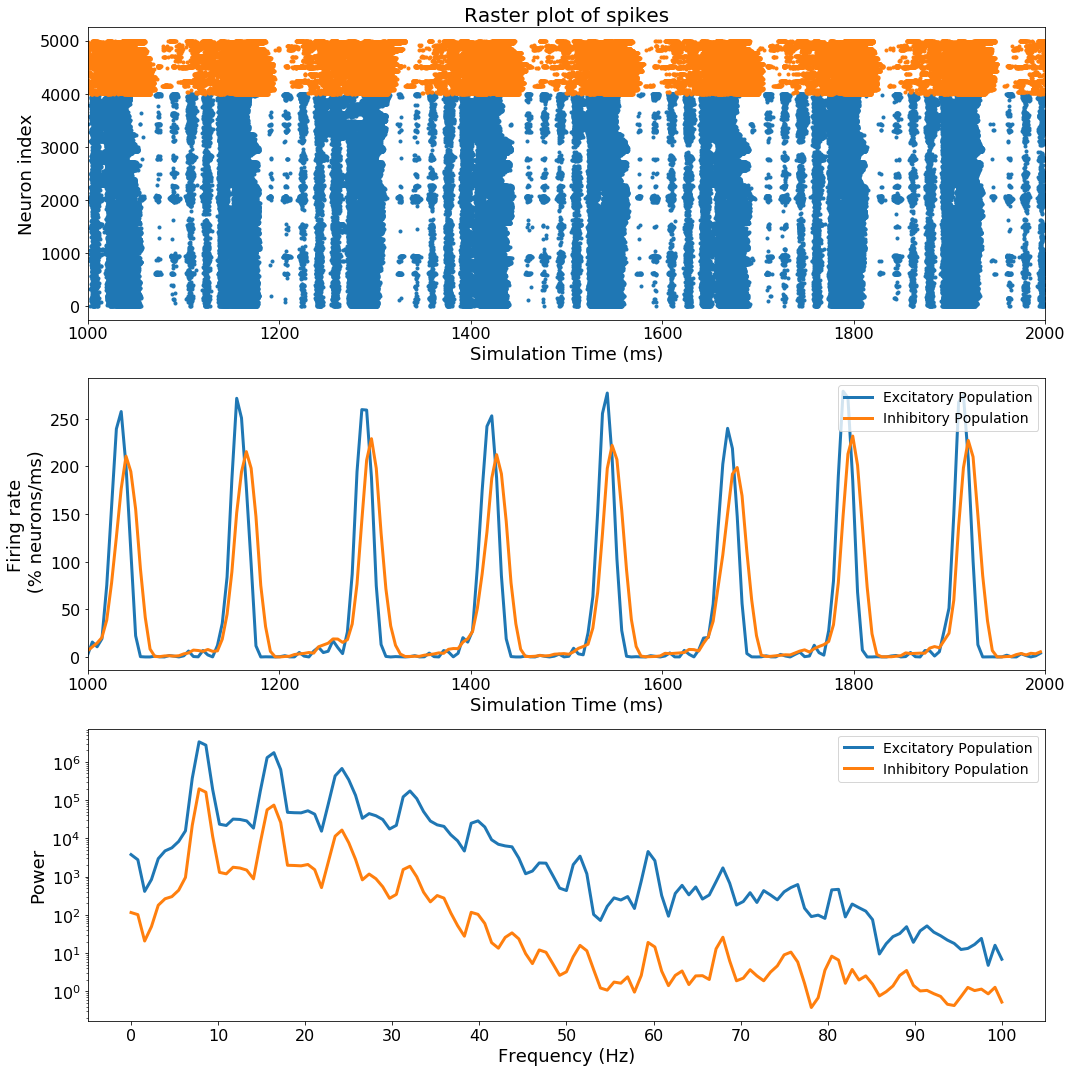

In [38]:
plot_stuff(data_array[-1])